## Content-Based Recommenders

#### BoW

In [9]:
# Combine all reviews per restaurant
aggregated_reviews = reviews_sampled.groupby("business_id")["text"].apply(lambda x: " ".join(x)).reset_index()
aggregated_reviews.rename(columns={"text": "combined_reviews"}, inplace=True)

# Merge review text with business data
restaurant_profiles = business_sampled.merge(aggregated_reviews, on="business_id", how="left")

# Fill NaN values (some restaurants may not have reviews)
restaurant_profiles["combined_reviews"] = restaurant_profiles["combined_reviews"].fillna("")


In [10]:
# applying BoW
# Keep sparse
from sklearn.feature_extraction.text import CountVectorizer

vectorizer_bow = CountVectorizer(stop_words='english', max_features=10000)
count_matrix_bow = vectorizer_bow.fit_transform(restaurant_profiles["combined_reviews"])

# Inspect shape and content sparsely
print("Shape:", count_matrix_bow.shape)
print("Sparsity: {:.2f}%".format(100 * (1 - count_matrix_bow.count_nonzero() / float(count_matrix_bow.shape[0] * count_matrix_bow.shape[1]))))

Shape: (10430, 10000)
Sparsity: 99.22%


In [11]:
default_stop_words = list(vectorizer_bow.get_stop_words())
print(default_stop_words[:20])

['fire', 'him', 'below', 'hereby', 'her', 'sixty', 'yours', 'whether', 'itself', 'becomes', 'eight', 'thence', 'in', 'detail', 'be', 'all', 'after', 'for', 'has', 'although']


In [12]:
CountVectorizer().fit_transform(restaurant_profiles['combined_reviews']).shape

(10430, 33945)

In [13]:
vectorizer_bow.get_feature_names_out()[:20]

array(['00', '000', '00am', '00pm', '01', '02', '03', '05', '06', '09',
       '10', '100', '1000', '101', '10am', '10mins', '10pm', '10th',
       '10x', '11'], dtype=object)

In [14]:
vectorizer_bow.get_feature_names_out()[-20:]

array(['zahav', 'zapp', 'zen', 'zephyrhills', 'zero', 'zest', 'zesty',
       'zhou', 'zinfandel', 'zing', 'zingers', 'zionsville', 'zip',
       'ziti', 'zoe', 'zombie', 'zone', 'zorba', 'zucchini', 'étouffée'],
      dtype=object)

In [15]:
set(count_matrix_bow.toarray().flatten())

{np.int64(0),
 np.int64(1),
 np.int64(2),
 np.int64(3),
 np.int64(4),
 np.int64(5),
 np.int64(6),
 np.int64(7),
 np.int64(8),
 np.int64(9),
 np.int64(10),
 np.int64(11),
 np.int64(12),
 np.int64(13),
 np.int64(14),
 np.int64(15),
 np.int64(16),
 np.int64(17),
 np.int64(18),
 np.int64(19),
 np.int64(20),
 np.int64(21),
 np.int64(22),
 np.int64(23),
 np.int64(24),
 np.int64(25),
 np.int64(26),
 np.int64(27),
 np.int64(28),
 np.int64(29),
 np.int64(30),
 np.int64(31),
 np.int64(33),
 np.int64(34),
 np.int64(35),
 np.int64(38)}

In [16]:
# converting to dataframe
count_matrix_bow_df = pd.DataFrame.sparse.from_spmatrix(
    count_matrix_bow,
    index=restaurant_profiles.index,
    columns=vectorizer_bow.get_feature_names_out()
)
count_matrix_bow_df.index = restaurant_profiles["combined_reviews"].index
count_matrix_bow_df.head()

,00,000,00am,00pm,01,02,03,05,06,09,...,zingers,zionsville,zip,ziti,zoe,zombie,zone,zorba,zucchini,étouffée
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


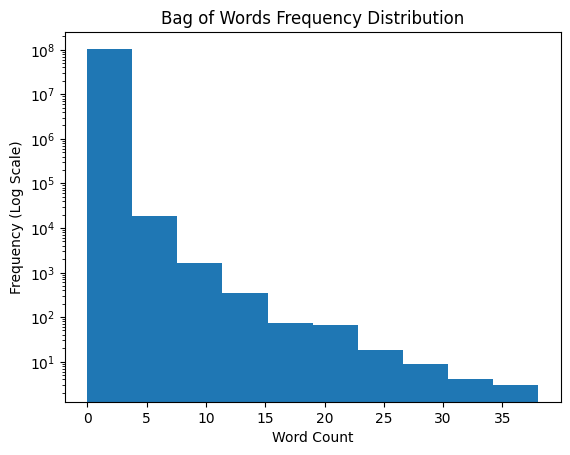

In [17]:
# visualizing the word frequency
import matplotlib.pyplot as plt

# Histogram of word frequencies
plt.hist(count_matrix_bow.toarray().flatten(), log=True, bins=10)
plt.title("Bag of Words Frequency Distribution")
plt.xlabel("Word Count")
plt.ylabel("Frequency (Log Scale)")
plt.show()

#### TF-IDF

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

# Create TF-IDF matrix
vectorizer_tfidf = TfidfVectorizer(stop_words='english', max_features=10000)
count_matrix_tfidf = vectorizer_tfidf.fit_transform(aggregated_reviews["combined_reviews"])

In [19]:
print("TF-IDF matrix shape:", count_matrix_tfidf.shape)
print("BoW Matrix Shape:", count_matrix_bow.shape)

TF-IDF matrix shape: (14030, 10000)
BoW Matrix Shape: (10430, 10000)


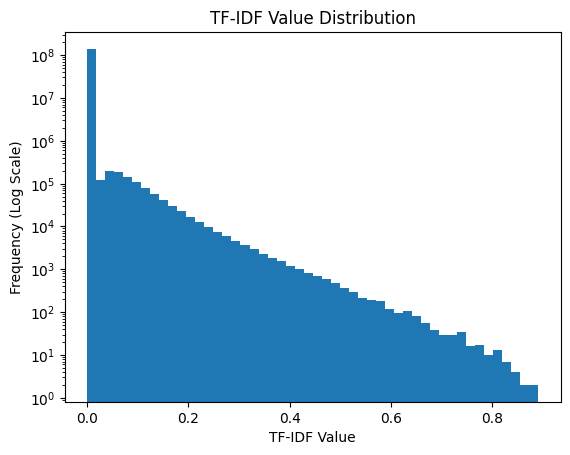

In [20]:
plt.hist(count_matrix_tfidf.toarray().flatten(), bins=50, log=True)
plt.title("TF-IDF Value Distribution")
plt.xlabel("TF-IDF Value")
plt.ylabel("Frequency (Log Scale)")
plt.show()

In [21]:
count_matrix_tfidf_df = pd.DataFrame(count_matrix_tfidf.toarray(), columns=vectorizer_tfidf.get_feature_names_out())
count_matrix_tfidf_df.index = aggregated_reviews.index
count_matrix_tfidf_df.head()

,00,000,00am,00pm,01,02,03,05,06,10,...,zero,zest,zesty,zing,zingers,ziti,zone,zot,zucchini,étouffée
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
# Check Frequency of Specific Words Across Restaurants
reviews_sampled['text'].str.lower().str.contains('help').sum()
reviews_sampled['text'].str.lower().str.contains('infinity').sum()

np.int64(3)

In [23]:
# viewing TF-IDF weights for one restaurant
sample_id = count_matrix_tfidf_df.index[0]  # or replace with a known ID
important_words = count_matrix_tfidf_df.loc[sample_id][count_matrix_tfidf_df.loc[sample_id] > 0].sort_values(ascending=False)
print(important_words.head(15))

reheated    0.541974
tastes      0.354882
eggs        0.326647
tea         0.323277
coffee      0.281562
places      0.253533
cooked      0.252446
way         0.219207
better      0.211093
order       0.182899
like        0.147597
food        0.118247
Name: 0, dtype: float64


#### LEMMATIZATION

In [24]:
import pandas as pd
import spacy
from tqdm import tqdm

# Aggregate reviews per restaurant
aggregated_reviews = reviews_sampled.groupby("business_id")["text"].apply(lambda x: " ".join(x)).reset_index()
aggregated_reviews.columns = ["business_id", "combined_reviews"]
aggregated_reviews.set_index("business_id", inplace=True)

In [25]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [26]:
# Select a single review from a restaurant (adjust index if needed)
text = aggregated_reviews["combined_reviews"].iloc[0]

# Process with spaCy
doc = nlp(text)

# Extract lemmatized tokens
lemmatized_tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
lemmatized_text = ' '.join(lemmatized_tokens)

# Display
print("Original Text:", text[:500], "...\n")
print("Lemmatized Text:", lemmatized_text[:500], "...")

Original Text: Eggs are reheated and the coffee tastes like tea. There are many places with way better food that is cooked to order ...

Lemmatized Text: egg reheat coffee taste like tea place way well food cook order ...


In [27]:
max_len = aggregated_reviews["combined_reviews"].apply(lambda x: len(str(x))).max()
print(f"Max review length: {max_len}")

Max review length: 33023


In [28]:
lemmatized_texts = []
for overview in tqdm(aggregated_reviews["combined_reviews"]):
  doc = nlp(overview)
  lemmatized_tokens = [token.lemma_ for token in doc]
  lemmatized_text = ' '.join(lemmatized_tokens)
  lemmatized_texts.append(lemmatized_text)

aggregated_reviews["combined_reviews_lem"] = lemmatized_texts

100%|██████████| 14030/14030 [13:12<00:00, 17.70it/s]


In [29]:
aggregated_reviews[['combined_reviews', 'combined_reviews_lem']].head()

,combined_reviews,combined_reviews_lem
business_id,,
-09Oc2D14vRnmirPh0vlXw,Eggs are reheated and the coffee tastes like t...,egg be reheat and the coffee taste like tea . ...
-0FX23yAacC4bbLaGPvyxw,We had dinner here tonight and we really want ...,we have dinner here tonight and we really want...
-0TffRSXXIlBYVbb5AwfTg,Went here for dinner and had the 5 course vale...,go here for dinner and have the 5 course valen...
-0iIxySkp97WNlwK66OGWg,Peter wanted to stop and get a quick breakfast...,"Peter want to stop and get a quick breakfast ,..."
-0jzoPt3UeXn6FUXVQvyPg,Ordered via room service and the breakfast + s...,order via room service and the breakfast + ser...


In [30]:
# applying tf-idf to lemmatized reviews
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_tfidf = TfidfVectorizer()
tfidf_matrix_lem = vectorizer_tfidf.fit_transform(aggregated_reviews["combined_reviews_lem"])

tfidf_df_lem = pd.DataFrame.sparse.from_spmatrix(
    tfidf_matrix_lem,
    index=aggregated_reviews.index,
    columns=vectorizer_tfidf.get_feature_names_out()
)

# Optionally preview just a few rows
tfidf_df_lem.head()

,00,000,000x,00am,00ish,00pm,01,01pm,02,03,...,übermenschian,ĩu,œuf,şerefe,夫妻肺片,家常豆腐,成都辣子鸡,河粉,笋尖炒肉丝,鱼香茄子
business_id,,,,,,,,,,,,,,,,,,,,,
-09Oc2D14vRnmirPh0vlXw,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-0FX23yAacC4bbLaGPvyxw,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-0TffRSXXIlBYVbb5AwfTg,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-0iIxySkp97WNlwK66OGWg,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-0jzoPt3UeXn6FUXVQvyPg,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
# comparing with non lemmatized tf idf
# Check shape difference
print("Before lemmatization:", count_matrix_tfidf.shape)  # Original TF-IDF
print("After lemmatization:", tfidf_matrix_lem.shape)  # TF-IDF on `combined_reviews_lem`

# Word inspection
business_sample = tfidf_df_lem.index[0]  # Choose any business_id
print(tfidf_df_lem.loc[business_sample].sort_values(ascending=False).head(10))

Before lemmatization: (14030, 10000)
After lemmatization: (14030, 33043)
reheat    0.520801
tea       0.330451
coffee    0.291731
egg       0.281376
be        0.251055
cook      0.248205
many      0.247582
way        0.22627
taste     0.207108
well      0.157812
Name: -09Oc2D14vRnmirPh0vlXw, dtype: Sparse[float64, 0]


In [34]:
# word comparison
# Check if "ruin" is present after lemmatization
tfidf_df_lem.loc[business_sample, "ruin"] if "ruin" in tfidf_df_lem.columns else "Not present"

0

### NER

In [36]:
import spacy.cli
spacy.cli.download("en_core_web_lg")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [37]:
import spacy
nlp_lg = spacy.load("en_core_web_lg")

In [35]:
import pandas as pd
from tqdm import tqdm

# Load the sampled reviews
reviews_df = pd.read_pickle("reviews_sampled.pkl")

# Combine reviews per restaurant
aggregated_reviews = reviews_df.groupby("business_id")["text"].apply(lambda x: " ".join(x)).reset_index()
aggregated_reviews.columns = ["business_id", "combined_reviews"]

In [38]:
# define NER extraction function
def get_entities(text, nlp):
    return [(e.text, e.label_) for e in nlp(text).ents]

In [39]:
# applying NER to reviews
import spacy
import pandas as pd
from tqdm import tqdm

# Ensure GPU is used
spacy.prefer_gpu()

# Load large model (already downloaded)
nlp_lg = spacy.load("en_core_web_lg")
nlp_lg.max_length = 2_000_000  # Increase max length to handle long docs

# Define your entity extraction function
def extract_entities(doc):
    return [(ent.text, ent.label_) for ent in doc.ents]

# Truncate overly long texts
def safe_review_text(text, max_chars=1_800_000):
    return text[:max_chars] if isinstance(text, str) else ""

# Prepare your list of safe texts
texts = [safe_review_text(t) for t in aggregated_reviews["combined_reviews"]]

# Batched NER using spaCy's pipe + tqdm
ner_results = []
batch_size = 64  #

for doc in tqdm(nlp_lg.pipe(texts, batch_size=batch_size, disable=["tagger", "parser", "lemmatizer"]), total=len(texts)):
    ner_results.append(extract_entities(doc))

# Assign to dataframe
aggregated_reviews["NER"] = ner_results

100%|██████████| 14030/14030 [07:18<00:00, 32.01it/s]


In [40]:
aggregated_reviews.to_pickle("aggregated_reviews_with_ner.pkl")

In [41]:
# Set display width and show sample NER outputs
pd.set_option('display.max_colwidth', 200)
aggregated_reviews[["combined_reviews", "NER"]].head(10)

,combined_reviews,NER
0,Eggs are reheated and the coffee tastes like tea. There are many places with way better food that is cooked to order,[]
1,We had dinner here tonight and we really want this place to do well....This is our 4th time since it opened.\nThe martinis were good\nThe olive oil/ tapenade dipping sauce was delicious.\nThe cau...,"[(tonight, TIME), (4th, ORDINAL), (2, CARDINAL), (4, CARDINAL), (Tonight, TIME), (78 degrees, QUANTITY)]"
2,Went here for dinner and had the 5 course valentines day menu. From what I understand this is similar to the regular tasting menu. The whole experience was almost perfect with 1 little slip up a...,"[(5, CARDINAL), (valentines day, DATE), (1 little slip, QUANTITY), (Bennett, PERSON), (first, ORDINAL), (two, CARDINAL), (thai, NORP), (afghani, NORP), (lamb shank, PERSON), (second, ORDINAL), (th..."
3,"Peter wanted to stop and get a quick breakfast, so I suggested Truckee Bagel.\nThey have a huge selection of fresh made bagels and cream cheese.\nToday I did not get a bagel, but listened to my in...","[(Peter, PERSON), (Truckee Bagel, ORG), (Blind, PERSON), (six day old, DATE), (3.50, CARDINAL), (20 oz , QUANTITY), (less than $3, MONEY), (Midtown, ORG)]"
4,Ordered via room service and the breakfast + service was great! The portion sizes are generous and the meal was exactly what we needed on a cold morning. The biscuits and gravy were some of the be...,"[(Boise, GPE)]"
5,"Really good place.\nBartenders are really nice, cocktails awesome and food delicious. Happy hours menu is great and 10% with yelp, yay! Spice 28 is a restaurant that doesn't quite live up to its n...","[(hours, TIME), (10%, PERCENT), (Indian, NORP), (Peking Duck, FAC), (four, CARDINAL)]"
6,"Went for dinner and a couple drinks. Was completely ignored at our booth for fifteen minutes-- almost walked out. (And no, the dining area was not even close to busy.) Server was a bartender who m...","[(fifteen, CARDINAL), (twenty minutes, TIME), (First, ORDINAL), (years, DATE), (the night, TIME), (only 2, CARDINAL), (Tucson, GPE), (5, CARDINAL), (a mellow night, TIME)]"
7,"Again, The Lemon Bar has exceeded all expectations. I just recently went again (yes, I am a regular) for their Galentine's events. I had so much fun. \n\nOne of the head decorators at The Flying C...","[(The Lemon Bar, ORG), (Galentine, ORG), (One, CARDINAL), (The Flying Cupcake, FAC), (three, CARDINAL), (one, CARDINAL), (Valentine, PERSON), (the last couple of years, DATE), (Covid, GPE), (Satur..."
8,Love this place. The service and food are spectacular. I brought a group of 5 with me and each of us loved our meals. The pork chop was fabulous and the blacken red fish was some of the best I hav...,"[(5, CARDINAL), (the Crawfish & Tasso Maque, ORG), (Choux, PRODUCT), (Galliano, GPE), (last weekend, DATE), (Warehouse District, LOC), (New Orleans, GPE), (1, CARDINAL), (Oysters & Angel Hair Past..."
9,My family are basically crab fanatics so we were bound to try this place out as soon as it opened. \nMy husband went first with his dad in which I was brought food - first impression was smelled a...,"[(first, ORDINAL), ($$$, MONEY)]"


In [42]:
# exploring entities by type
from collections import Counter
all_ents = [ent[1] for ents in aggregated_reviews["NER"] for ent in ents]
entity_counts = Counter(all_ents)
print(entity_counts.most_common(10))

[('CARDINAL', 22456), ('ORG', 16207), ('PERSON', 14052), ('DATE', 12047), ('GPE', 10771), ('NORP', 9858), ('TIME', 8550), ('MONEY', 5565), ('ORDINAL', 5489), ('PRODUCT', 2225)]


### **Similarity**

##### **Cosine Similarity**

In [43]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# DataFrames + business_id as index
business_sampled = business_sampled.set_index('business_id')
aggregated_reviews = aggregated_reviews.set_index('business_id')

# NER data
if 'ner_data' not in locals():
    ner_data = pd.read_pickle("aggregated_reviews_with_ner.pkl")
ner_data = ner_data.set_index('business_id')

def compute_similarity_matrix(matrix, index_ids):
    """Compute cosine similarity matrix with proper indexing"""
    sim_matrix = cosine_similarity(matrix)
    return pd.DataFrame(sim_matrix, index=index_ids, columns=index_ids)

# 1. BOW Similarity
bow_sim_matrix = compute_similarity_matrix(
    count_matrix_bow,
    business_sampled.index
)

# 2. TF-IDF Similarity (original text)
tfidf_sim_matrix = compute_similarity_matrix(
    count_matrix_tfidf,
    aggregated_reviews.index
)

# 3. Lemmatized TF-IDF Similarity
tfidf_lem_sim_matrix = compute_similarity_matrix(
    tfidf_matrix_lem,
    aggregated_reviews.index
)

# 4. NER-based Similarity
# Convert NER results to text strings first
ner_texts = ner_data['NER'].apply(
    lambda ents: ' '.join([f"{ent[0]}_{ent[1]}" for ent in ents]) if ents else ""
)

# Create TF-IDF matrix of NER features
vectorizer_ner = TfidfVectorizer()
ner_matrix = vectorizer_ner.fit_transform(ner_texts)
ner_sim_matrix = compute_similarity_matrix(ner_matrix, ner_data.index)

# Now align all matrices to use the same business IDs
common_businesses = set(business_sampled.index) & set(aggregated_reviews.index) & set(ner_data.index)
common_businesses = list(common_businesses)

# Filter all matrices to common businesses
bow_sim_matrix = bow_sim_matrix.loc[common_businesses, common_businesses]
tfidf_sim_matrix = tfidf_sim_matrix.loc[common_businesses, common_businesses]
tfidf_lem_sim_matrix = tfidf_lem_sim_matrix.loc[common_businesses, common_businesses]
ner_sim_matrix = ner_sim_matrix.loc[common_businesses, common_businesses]

In [44]:
def compare_recommendations(business_id, n=5):
    """Compare top recommendations from different models for a given business"""
    if business_id not in common_businesses:
        return f"Business {business_id} not found in all models"

    results = {}

    # Get business names for display
    biz_names = business_sampled['name']

    # BOW recommendations
    bow_recs = bow_sim_matrix[business_id].sort_values(ascending=False)[1:n+1]
    results['BOW'] = pd.DataFrame({
        'business_id': bow_recs.index,
        'name': biz_names.loc[bow_recs.index].values,
        'score': bow_recs.values
    })

    # TF-IDF recommendations
    tfidf_recs = tfidf_sim_matrix[business_id].sort_values(ascending=False)[1:n+1]
    results['TF-IDF'] = pd.DataFrame({
        'business_id': tfidf_recs.index,
        'name': biz_names.loc[tfidf_recs.index].values,
        'score': tfidf_recs.values
    })

    # Lemmatized TF-IDF recommendations
    tfidf_lem_recs = tfidf_lem_sim_matrix[business_id].sort_values(ascending=False)[1:n+1]
    results['Lemmatized TF-IDF'] = pd.DataFrame({
        'business_id': tfidf_lem_recs.index,
        'name': biz_names.loc[tfidf_lem_recs.index].values,
        'score': tfidf_lem_recs.values
    })

    # NER recommendations
    ner_recs = ner_sim_matrix[business_id].sort_values(ascending=False)[1:n+1]
    results['NER'] = pd.DataFrame({
        'business_id': ner_recs.index,
        'name': biz_names.loc[ner_recs.index].values,
        'score': ner_recs.values
    })

    return results

# Example usage
example_business = common_businesses[10]  # or choose a specific business_id
recommendations = compare_recommendations(example_business)

# Display results
for model_name, recs in recommendations.items():
    print(f"\n=== {model_name} Recommendations ===")
    display(recs)


=== BOW Recommendations ===


,business_id,name,score
0,vBQIBNOXsVrGNWKwaYEi7Q,The StoneRose Restaurant,0.425333
1,RRCgIohWjaeGtlbpcYJBbw,Lenny's Restaurant,0.412439
2,75FY8ZQx5nOWP0VFmNvWfw,Atchafalaya Restaurant,0.411371
3,prATCkHZzIXFvOzCuRi-TA,Rivershack Tavern,0.401574
4,z_7TZeTXsDH6MmkPHQN8nQ,Ella's Americana Folk Art Cafe,0.398118



=== TF-IDF Recommendations ===


,business_id,name,score
0,ZKPrXH_GNW_AtZ31tP3NmA,White Dog Cafe,0.231949
1,Iw8uqNPxviwcgxtruAx_LA,Good Dog Bar,0.223387
2,_FVht-z0stxzfTAXxGiUmw,Lloyd & Harry's,0.218345
3,LQcGL4hfJAeK6bk2ZdhmXw,Aqui Con El Nene,0.217687
4,6uH264PPrvVkV-7lhfss1g,MoonDog Grill,0.207248



=== Lemmatized TF-IDF Recommendations ===


,business_id,name,score
0,75FY8ZQx5nOWP0VFmNvWfw,Atchafalaya Restaurant,0.493014
1,Iw8uqNPxviwcgxtruAx_LA,Good Dog Bar,0.464670
2,6ajnOk0GcY9xbb5Ocaw8Gw,Barbuzzo,0.455452
3,z_7TZeTXsDH6MmkPHQN8nQ,Ella's Americana Folk Art Cafe,0.452775
4,1Efjww8n7WtKtKTgDqjgdA,Founding Farmers King of Prussia,0.451801



=== NER Recommendations ===


,business_id,name,score
0,9shXDmiEvRLgD93R6KlPNA,McDonald's,0.268266
1,gKThxS9CbVNM-58GbkRS4w,Roots,0.264304
2,Yyn4z5ZysBDYCXfTFzflaQ,Punch Bowl Social Indianapolis,0.255793
3,TUTQeLjq1UbkR5r8mOvMqw,Tito's Ceviche & Pisco,0.235427
4,qtg5d6UmDVFeUw5ZKVBl4Q,Coffee House Too,0.232370


##### **User Stories**

**User Story 1: The Foodie Explorer**

Scenario: Kareem loves trying new cuisines and wants to find restaurants similar to his favorite Mexican place.

In [45]:
def get_similar_restaurants(business_id, model='TF-IDF', n=5):
    """Get similar restaurants using specified model"""
    if model == 'BOW':
        sim_matrix = bow_sim_matrix
    elif model == 'TF-IDF':
        sim_matrix = tfidf_sim_matrix
    elif model == 'Lemmatized':
        sim_matrix = tfidf_lem_sim_matrix
    elif model == 'NER':
        sim_matrix = ner_sim_matrix
    else:
        raise ValueError("Invalid model specified")

    similar = sim_matrix.loc[business_id].sort_values(ascending=False)[1:n+1]
    return business_sampled.loc[similar.index, ['name', 'categories']].assign(similarity_score=similar.values)

# Find a Mexican restaurant as example
mexican_restaurants = business_sampled[business_sampled['categories'].str.contains('Mexican', na=False)]
example_restaurant = mexican_restaurants.index[0]

print("\n=== User Story: The Foodie Explorer ===")
print(f"Kareem loves: {business_sampled.loc[example_restaurant, 'name']}")
print("Recommended similar restaurants:")
display(get_similar_restaurants(example_restaurant, model='TF-IDF'))


=== User Story: The Foodie Explorer ===
Kareem loves: G Peppers Grill & Tavern
Recommended similar restaurants:


,name,categories,similarity_score
business_id,,,
T4Vtm5WHmH28rFjmstowPw,Pauline's Deli,"Restaurants, Delis",0.280936
9_m_iA3VAqGBJEW5XLc-5w,The Cuban Sandwich Shop,"Food, Restaurants, Cuban, Coffee & Tea, Cafes, Sandwiches",0.240460
6-ixjryKFrCgue3JaHnvXQ,Pearly's Beach Eats,"American (Traditional), Mexican, Restaurants, Local Flavor, Burgers, Sandwiches, Seafood, Salad, American (New), Tacos",0.205206
MbgRp2-3vkr8-td9DKxYzQ,Sausage Deli,"Delis, Sandwiches, Restaurants",0.205087
TopanQyFir2nX2h3e55OnA,The Sandwich on Main,"Cafes, Restaurants, Salad, Sandwiches, Soup",0.203932


**User Story 2: The Tourist**

Scenario: Kareem is visiting a new city and wants to find restaurants similar to his favorites back home.

In [46]:
# Find a well-rated restaurant in a tourist city
tourist_city = 'Tucson'  # or any city from your top cities analysis
potential_restaurants = business_sampled[
    (business_sampled['city'] == tourist_city) &
    (business_sampled['stars'] >= 4.5)
]

# Check if we found any restaurants
if len(potential_restaurants) > 0:
    tourist_restaurant = potential_restaurants.index[0]
else:
    # Fallback: either lower the rating threshold or choose a different city
    print(f"No highly-rated restaurants found in {tourist_city}, trying with lower rating...")
    potential_restaurants = business_sampled[
        (business_sampled['city'] == tourist_city) &
        (business_sampled['stars'] >= 4.0)  # Lower threshold
    ]

    if len(potential_restaurants) > 0:
        tourist_restaurant = potential_restaurants.index[0]
    else:
        # Final fallback - pick any restaurant in the city
        print(f"No restaurants found in {tourist_city}, picking another city...")
        tourist_city = business_sampled['city'].value_counts().index[0]  # Most common city
        tourist_restaurant = business_sampled[
            business_sampled['city'] == tourist_city
        ].index[0]

print("\n=== User Story: The Tourist ===")
print(f"Kareem's favorite back home: {business_sampled.loc[tourist_restaurant, 'name']}")
print(f"Located in: {business_sampled.loc[tourist_restaurant, 'city']}")
print("Categories:", business_sampled.loc[tourist_restaurant, 'categories'])
print("\nRecommended similar restaurants in other cities:")
recommendations = get_similar_restaurants(tourist_restaurant, model='Lemmatized')
# Filter to different cities
different_city_recs = recommendations[
    recommendations.index.map(lambda x: business_sampled.loc[x, 'city'] != tourist_city)
]
display(different_city_recs)


=== User Story: The Tourist ===
Kareem's favorite back home: Prep & Pastry
Located in: Tucson
Categories: Restaurants, Cocktail Bars, Bars, Comfort Food, American (New), Sandwiches, Nightlife, Breakfast & Brunch

Recommended similar restaurants in other cities:


,name,categories,similarity_score
business_id,,,
j-qtdD55OLfSqfsWuQTDJg,Parc,"Restaurants, French, Wine Bars, Nightlife, American (New), Bars, Cafes, Breakfast & Brunch",0.672838
iUZEGx29miZObLd6_lt7Vg,Sabrina's Café,"Breakfast & Brunch, Restaurants, Vegetarian, Cafes, American (New), Food, Diners, American (Traditional)",0.642708
6ajnOk0GcY9xbb5Ocaw8Gw,Barbuzzo,"Mediterranean, Restaurants, Pizza, Italian",0.641022
L5LLN0RafiV1Z9cddzvuCw,Ulele,"Breweries, Food, American (New), Beer, Wine & Spirits, Restaurants, Seafood",0.634620
pXRrRf8fDv6yU3xp1E25hA,Bud & Marilyn's,"Breakfast & Brunch, Nightlife, Bars, Restaurants, American (Traditional)",0.630817


**User Story 3: Health**

Scenario: Kareem is trying to be healthier and is looking for restaurants.

In [47]:
# Find a health-focused restaurant
health_terms = ['organic', 'healthy', 'vegan', 'vegetarian']
health_mask = business_sampled['categories'].str.contains('|'.join(health_terms), case=False, na=False)
health_restaurant = business_sampled[health_mask].index[0]

print("\n=== User Story: The Health-Conscious Diner ===")
print(f"Kareem's current favorite: {business_sampled.loc[health_restaurant, 'name']}")
print("Categories:", business_sampled.loc[health_restaurant, 'categories'])
print("Recommended similar healthy options:")
display(get_similar_restaurants(health_restaurant, model='NER'))


=== User Story: The Health-Conscious Diner ===
Kareem's current favorite: Red Hook Coffee & Tea
Categories: Restaurants, Breakfast & Brunch, Vegan, Bagels, Food, Coffee & Tea
Recommended similar healthy options:


,name,categories,similarity_score
business_id,,,
i1eCOY99XXkn3zEJMp6kew,Domino's Pizza,"Pizza, Sandwiches, Chicken Wings, Restaurants",1.000000
YoqnmZKGAULO58qF4OhYyg,Heartbreaker,"Restaurants, Cafes, Comfort Food",1.000000
jwGGsDKKOsrLjncBtDnHtw,Aladdin's Hookah Lounge and Bar,"Hookah Bars, Nightlife, Bars, Mediterranean, Middle Eastern, Restaurants",0.716661
Usj0t1Ts3zoTBnjhi-WA3A,Miss Saigon,"Nightlife, Vietnamese, Bubble Tea, Bars, Restaurants, Food, Cocktail Bars",0.716661
QuYmk23WAR4JEP6GNcxjWQ,Moe's Southwest Grill,"Restaurants, Tex-Mex, Mexican",0.716661


In [48]:
def compare_models_for_user(business_id, user_type):
    """Compare recommendations from all models for a user story"""
    print(f"\n=== Comparing Models for {user_type} ===")
    print(f"User's favorite restaurant: {business_sampled.loc[business_id, 'name']}")

    models = ['BOW', 'TF-IDF', 'Lemmatized', 'NER']
    results = {}

    for model in models:
        recs = get_similar_restaurants(business_id, model=model)
        # Calculate average similarity of recommendations
        avg_sim = recs['similarity_score'].mean()
        # Count how many share at least one category
        shared_cats = sum(
            1 for idx in recs.index
            if any(cat in business_sampled.loc[business_id, 'categories']
                  for cat in business_sampled.loc[idx, 'categories'].split(', '))
        )
        results[model] = {
            'avg_similarity': avg_sim,
            'shared_categories': shared_cats,
            'recommendations': recs
        }

    # Create comparison table
    comparison = pd.DataFrame.from_dict(results, orient='index')
    print("\nModel Comparison:")
    display(comparison[['avg_similarity', 'shared_categories']])

    return results

# Run comparison for our user stories
foodie_comparison = compare_models_for_user(example_restaurant, "Foodie Explorer")
tourist_comparison = compare_models_for_user(tourist_restaurant, "Tourist")
health_comparison = compare_models_for_user(health_restaurant, "Health-Conscious Diner")


=== Comparing Models for Foodie Explorer ===
User's favorite restaurant: G Peppers Grill & Tavern

Model Comparison:


,avg_similarity,shared_categories
BOW,0.316158,5
TF-IDF,0.227124,5
Lemmatized,0.444361,5
NER,0.420518,5



=== Comparing Models for Tourist ===
User's favorite restaurant: Prep & Pastry

Model Comparison:


,avg_similarity,shared_categories
BOW,0.518363,5
TF-IDF,0.272577,5
Lemmatized,0.644401,5
NER,0.423346,5



=== Comparing Models for Health-Conscious Diner ===
User's favorite restaurant: Red Hook Coffee & Tea

Model Comparison:


,avg_similarity,shared_categories
BOW,0.472452,5
TF-IDF,0.340910,5
Lemmatized,0.363297,5
NER,0.829997,5


##### **Coverage, Diversity and Cold Start**

**Coverage**

In [49]:
def calculate_coverage(sim_matrix, similarity_threshold=0.5):
    """Calculate what percentage of businesses receive at least one recommendation"""
    has_recommendation = (sim_matrix.max(axis=1) >= similarity_threshold)
    return 100 * has_recommendation.mean()

# Calculate for all models
coverage_results = {
    'BOW': calculate_coverage(bow_sim_matrix),
    'TF-IDF': calculate_coverage(tfidf_sim_matrix),
    'Lemmatized TF-IDF': calculate_coverage(tfidf_lem_sim_matrix),
    'NER': calculate_coverage(ner_sim_matrix)
}

pd.DataFrame(coverage_results.items(), columns=['Model', 'Coverage (%)'])

,Model,Coverage (%)
0,BOW,100.000000
1,TF-IDF,100.000000
2,Lemmatized TF-IDF,100.000000
3,NER,91.812081


**Diversity Metrics**

In [50]:
from sklearn.metrics import pairwise_distances

def calculate_diversity(sim_matrix, top_n=5):
    """Measure how dissimilar top recommendations are to each other"""
    top_recs = sim_matrix.apply(lambda x: x.nlargest(top_n+1).index[1:], axis=1)
    diversities = []
    for biz in top_recs.index:
        rec_ids = top_recs[biz]
        sub_matrix = sim_matrix.loc[rec_ids, rec_ids]
        diversities.append(1 - sub_matrix.values.mean())  # 1 - average similarity
    return np.mean(diversities)

print("Recommendation Diversity Scores:")
for name, matrix in [('BOW', bow_sim_matrix),
                    ('TF-IDF', tfidf_sim_matrix),
                    ('Lemmatized', tfidf_lem_sim_matrix)]:
    print(f"{name}: {calculate_diversity(matrix):.3f}")

Recommendation Diversity Scores:
BOW: 0.503
TF-IDF: 0.629
Lemmatized: 0.377
